In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import sys
sys.path.append('../..')
from modules.many_features import utils, constants
import matplotlib.pyplot as plt
%matplotlib inline

#### The data

In [9]:
test_df = pd.read_csv('../../../anemia_ml4hc/test_dfs/dueling_dqn_pr_test_df_seed_63_10000000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success
0,0.0,5.0,1.0,5.0,5.0,"['hemoglobin', 'gender', 'rbc', 'ret_count', '...",0.0,1.0
1,1.0,6.0,1.0,1.0,1.0,"['hemoglobin', 'gender', 'rbc', 'mcv', 'segmen...",0.0,1.0
2,2.0,8.0,1.0,4.0,4.0,"['hemoglobin', 'rbc', 'mcv', 'ferritin', 'hema...",0.0,1.0
3,3.0,2.0,1.0,0.0,0.0,"['hemoglobin', 'No anemia']",0.0,1.0
4,4.0,6.0,-1.0,7.0,7.0,"['hemoglobin', 'gender', 'rbc', 'mcv', 'segmen...",1.0,1.0


In [10]:
utils.test(test_df.y_actual, test_df.y_pred)

(97.18571428571428, 97.1643780144586, 98.38007040050316)

#### Basic

In [25]:
cr = classification_report(test_df.y_actual, test_df.y_pred, target_names = constants.CLASS_DICT.keys())
print(cr)

                                      precision    recall  f1-score   support

                           No anemia       0.92      1.00      0.96      2000
Vitamin B12/Folate deficiency anemia       0.96      0.98      0.97      1801
                  Unspecified anemia       1.00      0.98      0.99      1793
           Anemia of chronic disease       0.99      0.97      0.98      1772
              Iron deficiency anemia       0.98      0.98      0.98      1679
                    Hemolytic anemia       1.00      0.94      0.97      1805
                     Aplastic anemia       1.00      0.94      0.97      1806
              Inconclusive diagnosis       0.94      0.97      0.95      1344

                            accuracy                           0.97     14000
                           macro avg       0.97      0.97      0.97     14000
                        weighted avg       0.97      0.97      0.97     14000



#### Current

#### Using Tabulate

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tabulate import tabulate

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
# Convert the classification report to a table
table = tabulate([row.split() for row in report.split('\n')], headers='firstrow', tablefmt='grid')
print(table)

+-------------+----------+------------+-----------+
| precision   | recall   |   f1-score |   support |
+=============+==========+============+===========+
|             |          |            |           |
+-------------+----------+------------+-----------+
| setosa      | 1.00     |          1 |         1 |
+-------------+----------+------------+-----------+
| versicolor  | 1.00     |          1 |         1 |
+-------------+----------+------------+-----------+
| virginica   | 1.00     |          1 |         1 |
+-------------+----------+------------+-----------+
|             |          |            |           |
+-------------+----------+------------+-----------+
| accuracy    | 1.00     |         45 |           |
+-------------+----------+------------+-----------+
| macro       | avg      |          1 |         1 |
+-------------+----------+------------+-----------+
| weighted    | avg      |          1 |         1 |
+-------------+----------+------------+-----------+
|           

ValueError: 'cellColours' must have 21 rows

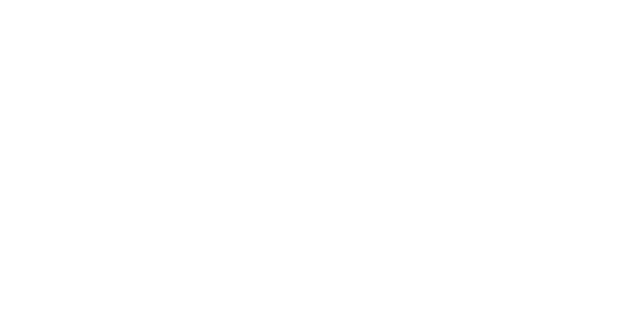

In [28]:
# Plot the table with black text on a white background
plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.axis('off')
ax.set_frame_on(False)
ax.table(cellText=table.split('\n'), loc='center', cellLoc='center', cellColours=['white'] * 4)

plt.show()